In [2]:
import json
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
json_years = ["2001", "2002", "2003", "2004"]
jsons = []
for y in json_years:
    jsons.append(json.load(open("./polyglot_results/" + y + "_results.json")))
print(jsons)

[{'utt_count': 6881, 'cs_count': 53, 'en_count': 48, 'detector_failed': 419, 'detector_not_failed': 6462, 'cs_dict': {'Polish': 2, 'German': 11, 'Greek': 25, 'Latin': 1, 'Spanish': 3, 'French': 3, 'Danish': 1, 'Japanese': 2, 'Portuguese': 1, 'Italian': 1, 'Norwegian Nynorsk': 1}, 'cs_convs': {'274220.0.0': {'Polish': 1}, '239914.0.0': {'German': 1}, '288364.0.0': {'Greek': 1}, '290703.0.0': {'German': 1}, '331544576.21753.21753': {'Latin': 1}, '331544572.18715.18715': {'German': 1}, '331544548.2157.2157': {'German': 1}, '296032.0.0': {'Greek': 1}, '248259.2760.2760': {'German': 1, 'Polish': 1}, '274511.0.0': {'Greek': 1}, '258838.0.0': {'Spanish': 1, 'French': 1}, '265956.0.0': {'Spanish': 1}, '272111.0.0': {'Greek': 1}, '255282.0.0': {'Greek': 1}, '255759.317.317': {'Danish': 1, 'Greek': 1}, '331587701.0.0': {'German': 1}, '262311.0.0': {'French': 1}, '334715993.0.0': {'Japanese': 1}, '264550.231.231': {'Greek': 1}, '267190.0.0': {'Greek': 1}, '247661.0.0': {'German': 1}, '256561.0.0'

In [4]:
def print_results_stats(year: str, detector_results: dict) -> None:
    print("------------------------------YEAR: " + year + "------------------------------")
    print("Total number of utterances in " + year + ": " + str(detector_results["utt_count"]))
    print("Total number of utterances with two or more languages: " + str(detector_results["cs_count"]))
    print("Total number of utterances with two or more languages, for which English is the main language: " + str(detector_results["en_count"]))
    print("\n")
    print("Percentage of utterances on which polyglot Detector ran successfully: " + str(round(100 * detector_results["detector_not_failed"] / (detector_results["detector_failed"] + detector_results["detector_not_failed"]), 2)) + "%")
    print("Percentage of utterances for which English is the main language in a comment with 2 or more languages: " + str(round(100 * detector_results["en_count"] / detector_results["utt_count"], 4)) + "%")
    print("\n")
    print("Number of 'code-switching' instances per language: ")
    for k, v in detector_results["cs_dict"].items():
        print(k + ": " + str(v))
    print("\n")

In [5]:
for i in range(len(json_years)):
    print_results_stats(json_years[i], jsons[i])

------------------------------YEAR: 2001------------------------------
Total number of utterances in 2001: 6881
Total number of utterances with two or more languages: 53
Total number of utterances with two or more languages, for which English is the main language: 48


Percentage of utterances on which polyglot Detector ran successfully: 93.91%
Percentage of utterances for which English is the main language in a comment with 2 or more languages: 0.6976%


Number of 'code-switching' instances per language: 
Polish: 2
German: 11
Greek: 25
Latin: 1
Spanish: 3
French: 3
Danish: 1
Japanese: 2
Portuguese: 1
Italian: 1
Norwegian Nynorsk: 1


------------------------------YEAR: 2002------------------------------
Total number of utterances in 2002: 40625
Total number of utterances with two or more languages: 135
Total number of utterances with two or more languages, for which English is the main language: 117


Percentage of utterances on which polyglot Detector ran successfully: 86.05%
Percent

Greek: 493
Chinese: 250
Japanese: 230
German: 157
French: 96
Polish: 62
Danish: 46
Spanish: 44
Russian: 39
Latin: 38


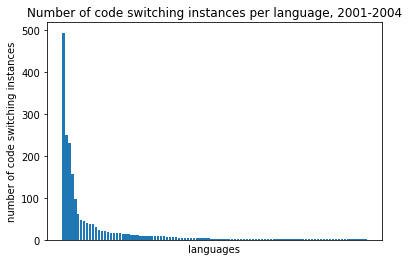

In [6]:
accum_cs_dict = defaultdict(int)
for d in jsons:
    for k, v in d["cs_dict"].items():
        accum_cs_dict[k] += v

accum_cs_tuples = []
for k, v in accum_cs_dict.items():
    accum_cs_tuples.append((k, v))
accum_cs_tuples = sorted(accum_cs_tuples, key=lambda x: x[1], reverse=True)

for el in accum_cs_tuples[:10]:
    print(el[0] + ": " + str(el[1]))

accum_langs = list(map(lambda x: x[0], accum_cs_tuples))
accum_freqs = list(map(lambda x: x[1], accum_cs_tuples))
plt.bar(accum_langs, accum_freqs)
plt.title("Number of code switching instances per language, " + json_years[0] + "-" + json_years[-1])
plt.ylabel("number of code switching instances")
plt.xlabel("languages")
plt.xticks([])
plt.show()

Text(0.5, 1.0, 'Distribution of number of code switching instances 2001-2004')

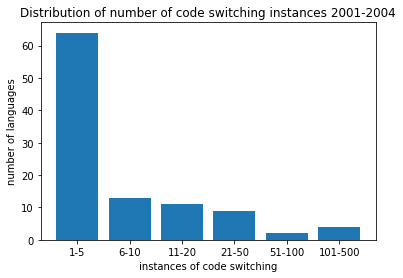

In [7]:
ranges = ["1-5", "6-10", "11-20", "21-50", "51-100", "101-500"]
bucket_freqs = [0, 0, 0, 0, 0, 0]
for i in accum_freqs:
    if i > 100:
        bucket_freqs[5] += 1
    elif i > 50:
        bucket_freqs[4] += 1
    elif i > 20:
        bucket_freqs[3] += 1
    elif i > 10:
        bucket_freqs[2] += 1
    elif i > 5:
        bucket_freqs[1] += 1
    else:
        bucket_freqs[0] += 1

plt.bar(ranges, bucket_freqs)
plt.xlabel("instances of code switching")
plt.ylabel("number of languages")
plt.title("Distribution of number of code switching instances " + json_years[0] + "-" + json_years[-1])

In [18]:
accum_en_count = sum([x["en_count"] for x in jsons])
accum_utts = sum([x["utt_count"] for x in jsons])
print("Total utterances: " + str(accum_utts))
print("Total number of code switching instances from English " + json_years[0] + "-" + json_years[-1] + ": "  + str(accum_en_count))

Total utterances: 801379
Total number of code switching instances from English 2001-2004: 1884


In [17]:
accum_topics_dict = {}
for d in jsons:
    for k, v in d["topics"].items():
        topic_instances = 0
        if k not in accum_topics_dict:
            accum_topics_dict[k] = defaultdict(int)
        for lang, lang_instances in v.items():
            topic_instances += lang_instances
            accum_topics_dict[k][lang] += lang_instances
        accum_topics_dict[k]["topic_instances"] += topic_instances

accum_topic_counts = []
for k, v in accum_topics_dict.items():
    accum_topic_counts.append((k, v["topic_instances"]))

accum_topic_counts = sorted(accum_topic_counts, key=lambda x: x[1], reverse=True)
for el in accum_topic_counts[:50]:
    print(el[0], el[1])

Quartic equation 6
Katakana 4
Greek alphabet 4
Korean language/Archive 1 4
Jurriaan Schulman 4
Philaleth 4
List of city name changes 4
Multilingual coordination 3
Grover's algorithm/Archive 1 3
Lambda calculus 3
Gamma function 3
Bopomofo 3
Pi 3
Estimator 3
Logarithmic integral function 3
Additive function 3
Liouville's theorem (Hamiltonian) 3
Japanese proverbs 3
2channel 3
Adrienne Clarkson 3
Formulax~enwiki 3
Menchi/Stardate 0.0003 3
Differential geometry of curves 3
Chinese interlanguage links 3
Phichit Province 3
Hawking radiation 3
Yellow Emperor 3
Thorn/Archive 1 2
Wave 2
Dagome iudex 2
Golden ratio 2
H.J. 2
EPR paradox 2
Definable real number 2
Comparison of American and British English 2
Multilingual coordination/Archive 1 2
Goldbach's conjecture 2
Hymn to Liberty 2
Greek language 2
Transcendental number 2
Multivariate normal distribution 2
Llanfairpwllgwyngyll 2
Koszalin 2
Tao Te Ching 2
Transliteration 2
Naming conventions (Chinese) 2
Palindrome 2
Haredi Judaism 2
Martingale (